In [1]:
import numpy as np
import pickle
import cv2
import os
import keras
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import backend as K
import pickle
import joblib
from keras.models import model_from_json
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

from keras.applications import ResNet50
from keras.optimizers import Adam

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = "true"


1 Physical GPUs, 1 Logical GPUs


In [3]:
ph1=r"C:\Users\aanis\Desktop\plantvillage1\aa\segmented\tomato"
li=0
x=[]
y=[]
for i in os.listdir(ph1):
    lab=[0,0,0,0,0,0,0,0,0,0]
    lab[li]=1
    ph2=ph1+f'\{i}'
    #print(ph2)
    li+=1
    for j in os.listdir(ph2):
        #print(j)
        ph3=ph2+f'\{j}'
        #print(x,np.array(cv2.imread(ph3)).reshape(256*256*3))
        #print(lab)
        x.append(np.array(cv2.imread(ph3)))
        y.append(lab)
print(x.shape)


AttributeError: 'list' object has no attribute 'shape'

In [4]:
print(np.array(y).shape)
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.2, random_state = 42) 
del x
del y
print(x_train.shape)

(18159, 10)
(14527, 256, 256, 3)


In [28]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,horizontal_flip=True, fill_mode="nearest")

In [29]:
wpath=r"C:\Users\aanis\Downloads\resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"

resnet = ResNet50(weights=wpath, include_top=False, input_shape=(256, 256, 3))


In [30]:
for layer in resnet.layers[:-4]:
    layer.trainable = False
    
model = Sequential()
model.add(resnet)

model.add(Dropout(0.5))
  
model.add(Flatten())
  
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))
    
#model.add(Dense(70, activation='elu'))
#model.add(Dropout(0.5))
 
#model.add(Dense(35, activation='elu'))
#model.add(Dropout(0.5))
  
#model.add(Dense(5, activation='elu'))
#model.add(Dropout(0.2))
  
#model.add(Dense(10, activation='softmax'))####38
  

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 8, 8, 2048)        23587712  
_________________________________________________________________
dropout_9 (Dropout)          (None, 8, 8, 2048)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              134218752 
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)             

In [ ]:
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

BS=32
print("ok")
train=model.fit(aug.flow(x_train, y_train, batch_size=BS),
                epochs=30,
                steps_per_epoch=len(x_train) // BS,
                validation_data=(x_test, y_test),verbose=1)





In [34]:
#model.save("resnet")

C:\Users\aanis\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
C:\Users\aanis\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: resnet\assets


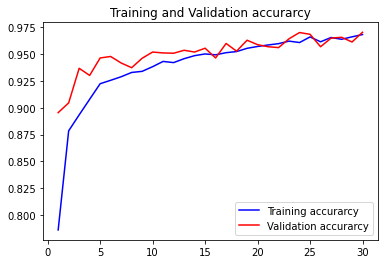

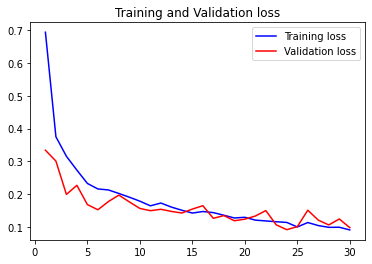

In [33]:
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [36]:
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

114/114 [==============================] - 158s 1s/step - loss: 0.0973 - accuracy: 0.9703
Test Accuracy: 97.02643156051636
